# Import libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random

#set plot style
import seaborn as sns
import matplotlib.pyplot as plt
#flatui = ["#2077b1", "#fe8029", "#2fa039", "#d82a2d"]
sns.set_palette("Set2")

## Generate codebook

In [2]:
# Import dataframe with multi index column names for generating the codebook
df1 = pd.read_csv('data_g1.csv', header=[0, 1])

# Prepare the codebook
codebook = df1.columns.to_frame(index=0, name=['question', 'options'])

In [3]:
df1.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Which of the following devices do you use to connect to the internet? (Check all that apply),Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,"Overall, how satisfied or dissatisfied are you with our company?",To what extent do you agree with each of the following?,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Desktop computer,Laptop computer,Tablet,Smart phone,Other (please specify),Response,The website is easy to use,The information on the website is credible,I will likely return to the website in future,I find the website to be attractive
0,10858623557,241097711,07/14/2019 06:03:59 PM,07/14/2019 06:04:08 PM,,NaN,NaN,NaN,NaN,NaN,NaN,Tablet,Smart phone,NaN,Somewhat satisfied,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,10858623386,241097711,07/14/2019 06:03:44 PM,07/14/2019 06:03:55 PM,NaN,NaN,NaN,NaN,NaN,Desktop computer,NaN,NaN,NaN,NaN,Very dissatisfied,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
2,10858622504,241097659,07/14/2019 06:02:36 PM,07/14/2019 06:02:54 PM,,NaN,NaN,NaN,NaN,NaN,Laptop computer,NaN,Smart phone,NaN,Somewhat satisfied,Strongly agree,Strongly agree,Undecided,Strongly agree
3,10858622198,241097659,07/14/2019 06:02:20 PM,07/14/2019 06:02:33 PM,,NaN,NaN,NaN,NaN,Desktop computer,NaN,NaN,Smart phone,NaN,Somewhat satisfied,Agree,Disagree,Agree,Disagree
4,10858621248,241097608,07/14/2019 06:01:14 PM,07/14/2019 06:01:33 PM,,NaN,NaN,NaN,NaN,Desktop computer,NaN,Tablet,NaN,dfsdsf,Neither satisfied nor dissatisfied,Undecided,Agree,Undecided,Undecided


## Merge the dataset that you download directly from Survey Monkey

In [4]:
# Prepare the merged version of dataframe, please replace the file names below
df_1 = pd.read_csv('data_g1.csv', header=None, prefix='Q').iloc[2:]
df_2 = pd.read_csv('data_g1.csv', header=None, prefix='Q').iloc[2:]


# Pass in group name
df_1['group'] = 'group_1'
df_2['group'] = 'group_2'

# Merge different datasets into one dataframe
df = df_1.append(df_2, ignore_index=True)

In [5]:
df.head()

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,group
0,10858623557,241097711,07/14/2019 06:03:59 PM,07/14/2019 06:04:08 PM,,NaN,NaN,NaN,NaN,NaN,NaN,Tablet,Smart phone,NaN,Somewhat satisfied,Strongly agree,Strongly agree,Strongly agree,Strongly agree,group_1
1,10858623386,241097711,07/14/2019 06:03:44 PM,07/14/2019 06:03:55 PM,NaN,NaN,NaN,NaN,NaN,Desktop computer,NaN,NaN,NaN,NaN,Very dissatisfied,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,group_1
2,10858622504,241097659,07/14/2019 06:02:36 PM,07/14/2019 06:02:54 PM,,NaN,NaN,NaN,NaN,NaN,Laptop computer,NaN,Smart phone,NaN,Somewhat satisfied,Strongly agree,Strongly agree,Undecided,Strongly agree,group_1
3,10858622198,241097659,07/14/2019 06:02:20 PM,07/14/2019 06:02:33 PM,,NaN,NaN,NaN,NaN,Desktop computer,NaN,NaN,Smart phone,NaN,Somewhat satisfied,Agree,Disagree,Agree,Disagree,group_1
4,10858621248,241097608,07/14/2019 06:01:14 PM,07/14/2019 06:01:33 PM,,NaN,NaN,NaN,NaN,Desktop computer,NaN,Tablet,NaN,dfsdsf,Neither satisfied nor dissatisfied,Undecided,Agree,Undecided,Undecided,group_1


## Faker package is used here to generate a larger fake dataset (instead of using the manually generated fake data from Survey Monkey)

In [6]:
from faker import Faker
fake = Faker()

#import a Provider
from faker.providers import BaseProvider

from datetime import datetime, timedelta

# create my new provider class
class MyProvider(BaseProvider):
    # define a method that return a random expense type
    def devDesktop(self):
        foo = ['Desktop computer', np.nan]
        return random.choice(foo)
    def devLaptop(self):
        foo = ['Laptop computer', np.nan]
        return random.choice(foo)
    def devTablet(self):
        foo = ['Tablet', np.nan]
        return random.choice(foo)
    def devPhone(self):
        foo = ['Smart phone', np.nan]
        return random.choice(foo)
    def satLevel(self):
        foo = ['Very satisfied', 'Somewhat satisfied', 'Neither satisfied nor dissatisfied', 'Somewhat dissatisfied', 'Very dissatisfied']
        return random.choice(foo)
    def agreeLevel(self):
        foo = ['Strongly agree', 'Agree', 'Undecided', 'Disagree', 'Strongly disagree']
        return random.choice(foo)
    def group(self):
        foo = ['Group 1', 'Group 2']
        return random.choice(foo)

# then add my new provider to faker instance
fake.add_provider(MyProvider)

In [7]:
def createFakeDataset(num_examples):
    """Function that creates a fake dataset using the python module Faker
    
    Args:
        num_examples (int): number of fake examples to generate

    Returns:
        pandas.core.frame.DataFrame: the final dataframe

    """
    
    l_response_ID = []
    l_collector_ID = []
    l_start_dates = []
    l_end_dates = []
    l_devDesktop = []
    l_devLaptop = []
    l_devTablet = []
    l_devPhone = []
    l_devOther = []
    l_satLevel = []
    l_matrix1 = []
    l_matrix2 = []
    l_matrix3 = []
    l_matrix4 = []
    l_group = []
    l_missing = []
    
    for _ in range(num_examples):
        l_response_ID.append(fake.random_int(min=10000000000, max=99999999999))
        l_collector_ID.append(fake.random_int(min=100000000, max=999999999))        
        # create a fake date within 30 days
        fake_date = fake.date_time_between(start_date="-30d", end_date="now", tzinfo=None)
        l_start_dates.append(fake_date)
        l_end_dates.append(fake_date + timedelta(minutes=random.randrange(90)))
        # create fake data for device question 
        l_devDesktop.append(fake.devDesktop())
        l_devLaptop.append(fake.devLaptop())
        l_devTablet.append(fake.devTablet())
        l_devPhone.append(fake.devPhone())
        # create fake data for satisfaction question
        l_satLevel.append(fake.satLevel())
        # create fake data for the matrix question
        l_matrix1.append(fake.agreeLevel())
        l_matrix2.append(fake.agreeLevel())
        l_matrix3.append(fake.agreeLevel())
        l_matrix4.append(fake.agreeLevel())
        # create fake data for group
        l_group.append(fake.group())
        # create a list of missing values
        l_missing.append(np.nan)
        
    # create a dataframe    
    df = pd.DataFrame({'Q0': l_response_ID, 'Q1': l_collector_ID, 'Q2': l_start_dates, 'Q3': l_end_dates, 
                       'Q4': l_missing,'Q5': l_missing, 'Q6': l_missing,'Q7': l_missing,'Q8': l_missing,
                       'Q9': l_devDesktop, 'Q10': l_devLaptop, 'Q11': l_devTablet, 'Q12': l_devPhone,
                       'Q13': l_missing, 'Q14': l_satLevel, 
                       'Q15': l_matrix1, 'Q16': l_matrix2, 'Q17': l_matrix3, 'Q18': l_matrix4, 'group': l_group
                      })

    return df

In [8]:
df = createFakeDataset(200)

In [9]:
df.head()

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,group
0,52039878513,782505333,2019-07-05 20:19:01,2019-07-05 20:41:01,NaN,NaN,NaN,NaN,NaN,Desktop computer,Laptop computer,Tablet,NaN,NaN,Very satisfied,Undecided,Undecided,Strongly agree,Agree,Group 2
1,86500159142,425020828,2019-06-23 20:54:04,2019-06-23 21:53:04,NaN,NaN,NaN,NaN,NaN,NaN,Laptop computer,Tablet,NaN,NaN,Very dissatisfied,Undecided,Disagree,Agree,Agree,Group 1
2,96872363244,945730009,2019-07-03 23:13:00,2019-07-04 00:28:00,NaN,NaN,NaN,NaN,NaN,Desktop computer,Laptop computer,Tablet,Smart phone,NaN,Very dissatisfied,Agree,Strongly agree,Agree,Strongly agree,Group 1
3,74691201442,821869835,2019-06-24 07:29:23,2019-06-24 08:38:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tablet,Smart phone,NaN,Neither satisfied nor dissatisfied,Disagree,Undecided,Disagree,Strongly disagree,Group 2
4,26036249413,995425011,2019-06-23 09:22:55,2019-06-23 09:22:55,NaN,NaN,NaN,NaN,NaN,NaN,Laptop computer,NaN,Smart phone,NaN,Neither satisfied nor dissatisfied,Disagree,Strongly agree,Strongly agree,Agree,Group 2


In [10]:
df.group.value_counts()

Group 2    105
Group 1     95
Name: group, dtype: int64

# Visualize multi-answer question by group (Checkboxes)

In [11]:
def prepare_sub_data(data, codebook, group, group_name, column_list):
    col_name = codebook.options[list(column_list)].reset_index(drop = True)
    data_sub = data[data[group]==group_name].iloc[:,column_list].dropna(how = 'all') 
    s_count = data_sub.notnull().sum()
    s_per = pd.Series(s_count.to_numpy()/len(data_sub)*100, name="percentage(%)")
    print(group_name + " Answered: " + str(len(data_sub)))
    table_sum = pd.concat([s_per, col_name], axis=1)
    table_sum[group] = group_name
    return table_sum

def prepare_data_summary(data, column_list, groups):
    first_group, *other_groups = groups
    table_sum = prepare_sub_data(data, codebook, 'group', first_group, column_list)
    for group in other_groups:
        table_sum = table_sum.append(prepare_sub_data(data, codebook, 'group', group, column_list))
    return table_sum

def gen_chart_checkbox(data, column_list):
    listOfGroup = list(data.group.unique())
    listOfGroup.sort()
    table_sum = prepare_data_summary(data, column_list, listOfGroup)
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = "percentage(%)", y = 'options', hue = 'group', hue_order = listOfGroup, data = table_sum)
    ax.set(xlim = (0,100))
    ax.set_ylabel('') 
    plt.title(codebook.iloc[column_list[0],0],fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='group')
    return plt.show()

Group 1 Answered: 86
Group 2 Answered: 100


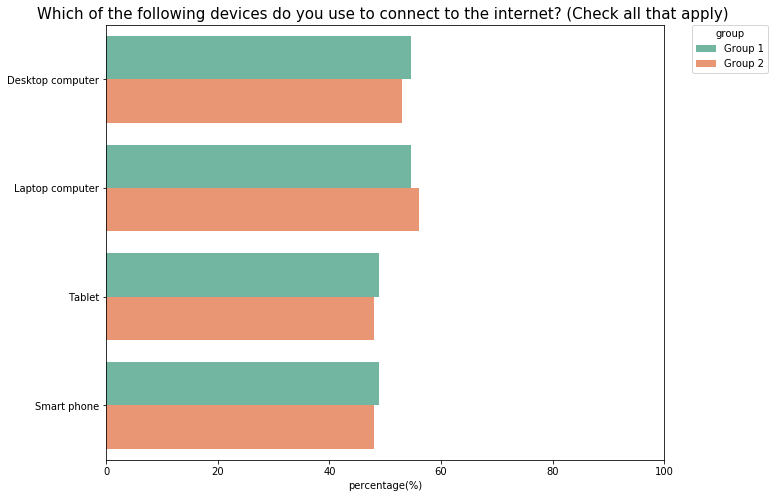

In [12]:
gen_chart_checkbox(df, range(9,13))

# Visualize single-answer question by group (Radio Button)

In [13]:
def gen_chart_radiobutton(data, question_name, index):
    print("Number of answers in each group: ")
    print(data[[question_name,'group']].groupby('group').count())
    i_counts = (data.groupby(['group'])[question_name]
                         .value_counts(normalize=True)
                         .rename('percentage(%)')
                         .mul(100)
                         .reset_index().round(2)
               )
    
    listOfGroup = list(df.group.unique())
    listOfGroup.sort()
    
    fig, ax = plt.subplots(figsize=(10,8))
    fig = sns.barplot(x="percentage(%)", y=question_name, order=index, hue="group", hue_order = listOfGroup, data=i_counts)
    
    
    plt.title(codebook.iloc[int(question_name[1:]),0])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='group')
    ax.set(xlim = (0,100))
    ax.set_ylabel('') 
    return plt.show()

Number of answers in each group: 
         Q14
group       
Group 1   95
Group 2  105


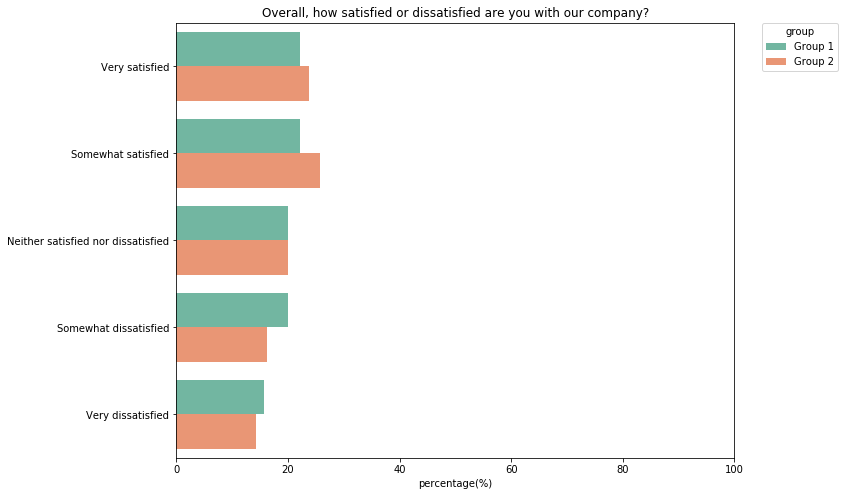

In [14]:
index = ['Very satisfied', 'Somewhat satisfied', 
         'Neither satisfied nor dissatisfied', 'Somewhat dissatisfied', 'Very dissatisfied']
gen_chart_radiobutton(df, 'Q14', index)


# Visualize matrix question by group

In [15]:
# Please customize the manual coding here
def score_to_numeric(x):
    if x=='Strongly agree':
        return 5
    if x=='Agree':
        return 4
    if x=='Undecided':
        return 3
    if x=='Disagree':
        return 2
    if x=='Strongly disagree':
        return 1

def numerical_describe(data):
    res = []
    cols = data.columns
    for col in cols:
        x = data[col].astype(np.float)
        res.append([col, "%.2f" % x.mean(), "%.2f" % x.std(), x.count()])
    return pd.DataFrame(columns=['variable','mean','std','n'], 
                        data=res).set_index('variable').sort_values(by=['mean'],ascending=False)

def gen_sub_table(data, group_name, col_range):
    
    data_sub = data[data['group']==group_name].iloc[:,col_range].dropna(how='all')
    
    for var in data_sub.columns:
        data_sub[var] = data_sub[var].apply(score_to_numeric)

    return data_sub

def gen_table(data, group_name, col_range):
    data_sub = gen_sub_table(data, group_name, col_range)
       
    data_describe = numerical_describe(data_sub)
    
    index = []
    
    for var in data_describe.index:
        i=int(var[1:])
        index.append(codebook.iloc[i,1])
    
    data_describe['item'] = index
    
    return data_describe


In [16]:
#Generate a chart to compare the importance of missing features across two groups
def compare_importance(data, groups, col_range):
    
    group_name_to_describe_data = {}
    
    for i,group_name in enumerate(groups):
        group_name_to_describe_data[group_name]='data_describe_%s'%i

    for group_name in groups:
        group_name_to_describe_data[group_name] = gen_table(data, group_name, col_range)

    #Visualize the mean value with the 95% confidence interval
    
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    
    for group_name in groups:
        plt.errorbar(group_name_to_describe_data[group_name]['mean'].astype(float), group_name_to_describe_data[group_name]['item'], xerr=1.96*(group_name_to_describe_data[group_name]['std'].astype(float)/(group_name_to_describe_data[group_name]['n']**.5)), fmt='o',elinewidth = .5, capsize = 4, marker='o', ms=4, label=group_name)

    plt.legend(loc='lower right')
    
    plt.title('Compare the mean values across groups (scale 1-5)')

    plt.show()

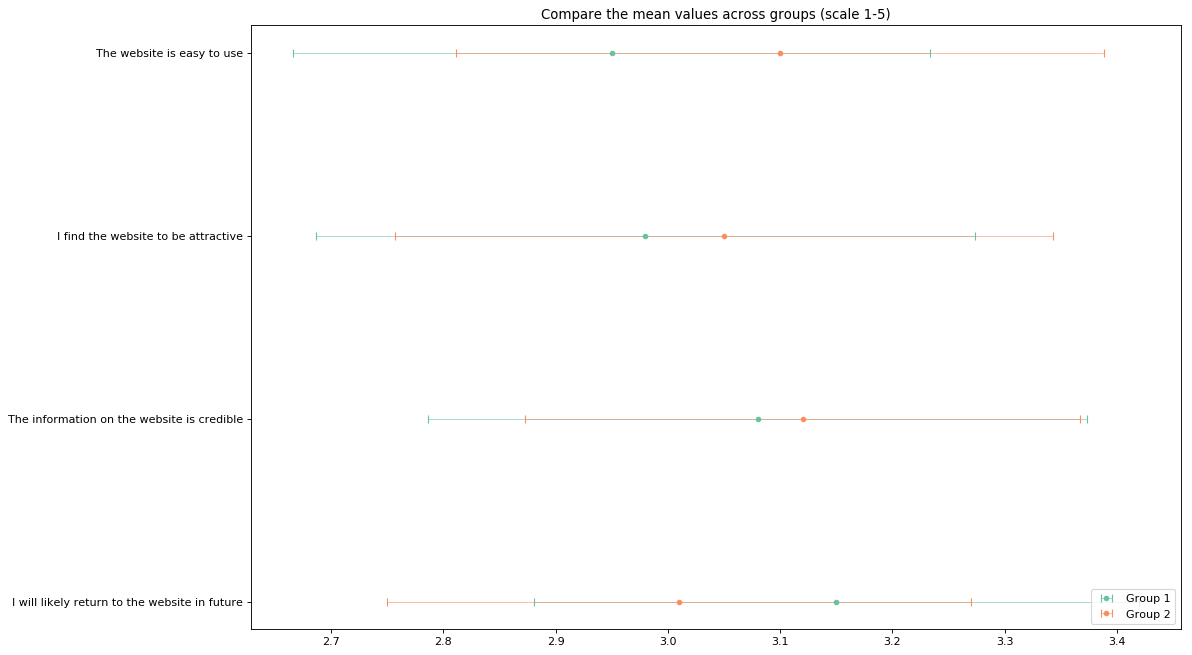

In [17]:
# Compare the Group 1 and 2
compare_importance(df, ['Group 1', 'Group 2'], range(15,19))